# Assignment 7 Work with Rasters_Hanqi

## Part 1: Raster Basics and Properties

### 1.1 Raster Dataset preparation: (10 pnts)

- From the ../data folder in this repository, find the Ex7.zip file as the input datasets
- Extract the zip file to a folder,for example, "c:/Documents/ex7"
- Note for the above step, do not use a path name that contains spaces or other special characters because some datasets do not like such characters!
- Check the files in the ex7 folder
- In ArcGIS Pro, create a new notebook for this exercise,
- In the first block, Use arcpy.Walk() function to list all raster datasets in the folder.
- Make sure the output of this code block shows correct results

In [2]:
## set the workspace
arcpy.env.workspace=r"D:\GEOG4057_HW07\Ex7"

### Check the available raster datasets in a workspace
import arcpy
walk = arcpy.da.Walk()
for file in walk:
    print(file)

('D:\\GEOG4057_HW07\\Ex7', [], ['elevation', 'landcover.tif', 'tm.img', 'watershed_HUC12.shp'])


### 1.2 Basic Properties Documentation: (20 pnts)

- Document and discuss the basic properties of the raster datasets in the ex7 folder.
  - Determine and record the number of bands in the raster dataset using the bandCount property.
  - Explore the spatial resolution, cell size, and pixel bit depth using relevant properties provided by ArcPy.
  - Print the spatial reference information of the rasters

In [31]:
TMraster = arcpy.Raster(r"D:\GEOG4057_HW07\Ex7\tm.img")

TMdesc = arcpy.da.Describe(TMraster)
TMdesc

{'catalogPath': 'D:\\GEOG4057_HW07\\Ex7\\tm.img',
 'FIDSet': None,
 'size': 12533142,
 'dateCreated': '2024-10-24T16:32:32.000',
 'dateAccessed': '2025-01-14T21:03:36.000',
 'dateModified': '2024-10-24T16:32:32.000',
 'workspace': <geoprocessing describe data object at 0x288d9ec8a90>,
 'supportsBigObjectID': False,
 'supportsBigInteger': False,
 'supportsTimeOnly': False,
 'supportsDateOnly': False,
 'supportsTimestampOffset': False,
 'bandCount': 3,
 'baseName': 'tm',
 'canVersion': False,
 'changeTracked': False,
 'children': [{'catalogPath': 'D:\\GEOG4057_HW07\\Ex7\\tm.img\\Layer_1',
   'FIDSet': None,
   'workspace': <geoprocessing describe data object at 0x288d9ec8930>,
   'supportsBigObjectID': False,
   'supportsBigInteger': False,
   'supportsTimeOnly': False,
   'supportsDateOnly': False,
   'supportsTimestampOffset': False,
   'baseName': 'Layer_1',
   'canVersion': False,
   'changeTracked': False,
   'children': [],
   'childrenExpanded': True,
   'dataElementType': 'DERast

In [20]:
#  number of bands
TMdesc["bandCount"]

3

In [29]:
# spatial resolution
TMraster.size


3

In [16]:
# cell size
TMraster.extension

<class 'AttributeError'>: 'Raster' object has no attribute 'size'

In [28]:
# pixel bit depth
TMraster.

12533142

## Part 2: Raster Analysis

### 2.1 Slope Analysis: (10 pnts)

- Apply the Slope analysis using the arcpy.sa.Slope tool on the "elevation" dataset.
- Save the output raster generated after applying the Slope analysis.
- Render the output raster in your Jupyter Notebook and discuss the changes observed in the dataset after the Slope analysis. You may explain any topographic insights or landscape information derived from the slope analysis.

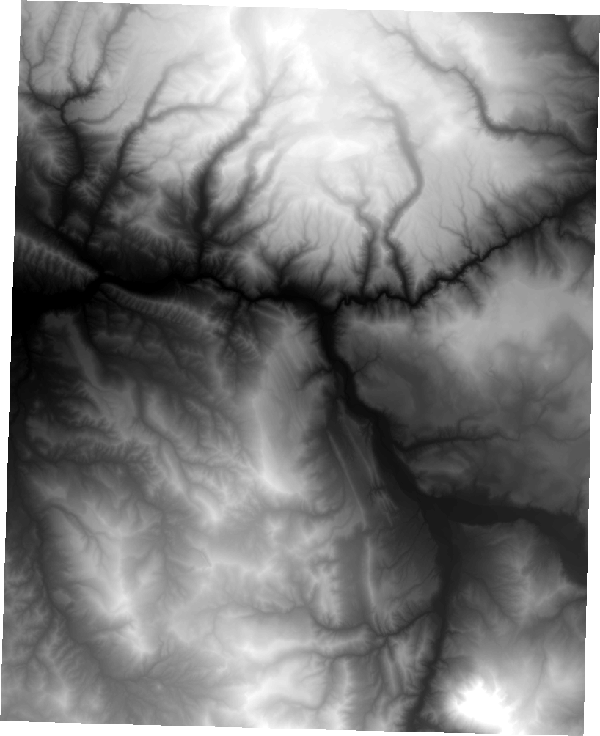

In [49]:
elev = arcpy.Raster(r"D:\GEOG4057_HW07\Ex7\elevation")
elev
# arcpy.Render (elev, colormap="Elevation #1")

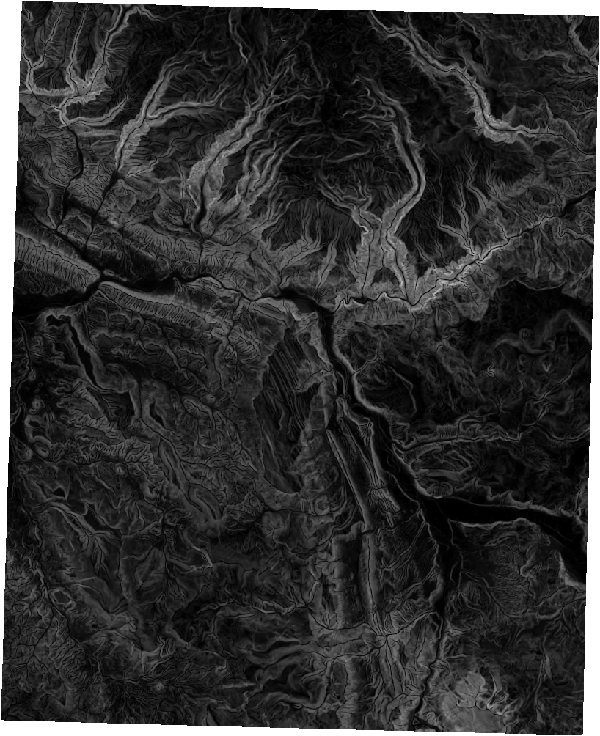

In [34]:
# Slope analysis

from arcpy.sa import *
from arcpy.ia import *

elve_Slope = Slope(elev)
elve_Slope

In [35]:
## set the workspace
## arcpy.env.workspace=r"D:\GEOG4057_HW07\Ex7"

if arcpy.Exists('elve_Slope'):
    arcpy.management.Delete('elve_Slope')
elev.save('elve_Slope')

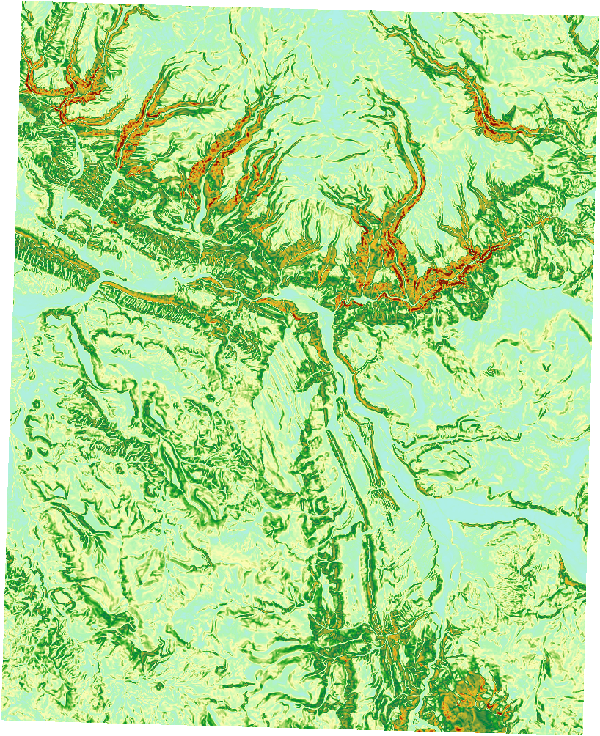

In [37]:
# Render the output raster
arcpy.Render(elve_Slope, colormap="Elevation #1")

In [ ]:
The rendered slope displays the ridges of the mountian more clearly, with the deep yellow to red color

### 2.2 Clipping Operation: (10 pnts)

- Perform a Clipping operation on the elevation dataset using the arcpy.sa.Clip tool using the "watershed_HUC12.shp" feature class as the clip layer
- Save and analyze the clipped raster.
- Discuss the importance and relevance of the clipped raster in relation to the original dataset.

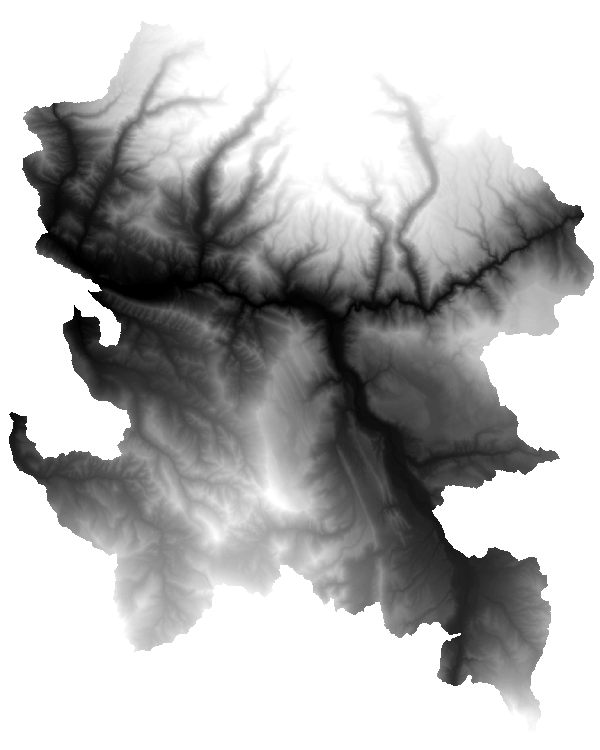

In [47]:
elev_clip = Clip(elev, "watershed_HUC12")
elev_clip

In [48]:
if arcpy.Exists('clipped_elev'):
    arcpy.management.Delete('clipped_elev')
elev.save('clipped_elev')

The clipped raster is a shared part of both the original raster and the polygon, without modifying the raster values. Using the clipping function, the specified region can be analysed.

## Part 3: Raster Manipulation

### 3.1 Map Algebra Operators: (10 pnts)

- Use bands in "tm.img" as rasters to perform a raster calculator with the formula: "(band 3 - band 1) / (band 3 + band 1)"
- Note, in the above formula, you need to create arcpy.Raster objects from the tm.img file
- Show the result in the notebook
- Save the data to your workspace by using .save() function of the Raster object
- Document and explain the transformation carried out, and discuss the purpose or utility of the operation.

### 3.2 Raster Cell Iterator: (15 pnts)

- Modify Cell Iterator example below to create a new raster called 'elev_reclass' based on condition: if the elevation is greater than 2000, assigned the cell with 1; otherwise, assign the cell with 0.

In [ ]:
import numpy as np
import arcpy
from arcpy.sa import Raster, RasterCellIterator
# read the elevation model
dem = Raster("elevation")
arcpy.env.overwriteOutput = True

#get knowledge about the input raster
raster_info = dem.getRasterInfo()
cell_x = dem.meanCellWidth
cell_y = dem.meanCellHeight

# change the raster info so the output type is 32bit unsigned integer
raster_info.setPixelType("U32")
#create a new raster based on the raster info
elev_relcass = Raster(raster_info)
#update the raster using cell iterator
with RasterCellIterator({'rasters':[dem,elev_reclas]}) as rci:
    for r, c in rci:
        # modify this block here to do the classification of elevation to 1 or 0

elev_relcass.save('elev_relcass')

- Provide explanations of the RasterCellIterator class and how to use it.

## Part 4: NumPy and Raster Integration

### 4.1 NumPy Array Conversion: (15 pnts)

- Convert the 'elevation' dataset to a NumPy array using the arcpy.RasterToNumPyArray() function.
- Use the min(), max(), mean(), and std() functions from Numpy to compute the raster data statistics.
- Discuss the advantages and applications of using NumPy arrays for raster data processing in GIS.

### 4.2 Submission Guidelines

- Present a well-documented Jupyter Notebook containing all your code, outputs, observations, and analysis for each part of the assignment.
- Use the markdown blocks to include detailed explanations and interpretations of the results obtained from various raster operations.
- Provide visualizations wherever necessary to support your analysis.
- Submit the report ontime (10 pnts)

### 4.3 Evaluation Criteria

- Accuracy and completeness of the documentation regarding raster properties and functionalities utilized.
- Effective use of geoprocessing tools and libraries (arcpy.sa and NumPy) for raster manipulation and analysis.
- Critical analysis and interpretations of the transformed raster dataset.

Note: Experiment with various operations, conduct comparisons, and explore the practical utility of each function or tool on the chosen raster dataset to broaden your understanding of working with raster data in ArcPy.